In [1]:
class MyIterable:
    def __init__(self, data):
        self.data = data
        self.index = 0

    def __iter__(self):
        return self

    def __next__(self):
        if self.index < len(self.data):
            result = self.data[self.index]
            self.index += 1
            return result
        else:
            raise StopIteration

# Create an instance of MyIterable
my_iterable = MyIterable([1, 2, 3, 4, 5])

# Iterate over the instance
for item in my_iterable:
    print(item)

1
2
3
4
5


In [1]:
import mlp

print(mlp.__file__)

/home/noxiusk/mlpractical/mlp/__init__.py


In [2]:
import mlp.data_providers

print(mlp.data_providers.__file__)

/home/noxiusk/mlpractical/mlp/data_providers.py


(1020, 33)
[  1.4   16.4    3.7    0.1    5.8   12.9    4.3    4.5   10.4   13.2
   0.3    0.1    9.3   29.6   23.4    2.3    9.8    8.9    0.4    2.9
   6.7    2.4    2.8    0.     0.4    1.9    2.3    0.3    0.     0.9
 -99.99]
(32964,)
[1.931e+03 1.000e+00 1.400e+00 2.100e+00 2.500e+00 1.000e-01 0.000e+00
 0.000e+00 9.000e-01 6.200e+00]
[[1.931e+03 1.000e+00 1.400e+00 2.100e+00 2.500e+00]
 [1.000e-01 0.000e+00 0.000e+00 9.000e-01 6.200e+00]
 [1.900e+00 4.900e+00 7.300e+00 8.000e-01 3.000e-01]
 [2.900e+00 7.500e+00 1.879e+01 1.300e+00 1.029e+01]]
[[1.931e+03 1.000e+00 1.400e+00 2.100e+00]
 [1.000e-01 0.000e+00 0.000e+00 9.000e-01]
 [1.900e+00 4.900e+00 7.300e+00 8.000e-01]] [2.5 6.2 0.3]
last =  [[1.931e+03 1.000e-01 1.900e+00 2.900e+00]
 [1.000e+00 0.000e+00 4.900e+00 7.500e+00]
 [1.400e+00 0.000e+00 7.300e+00 1.879e+01]
 [2.100e+00 9.000e-01 8.000e-01 1.300e+00]]


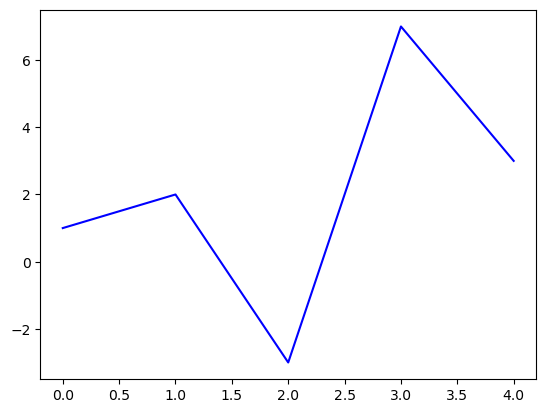

In [74]:
import numpy as np
import os
import mlp.data_providers as data_providers
import matplotlib.pyplot as plt

data_path = os.path.join(
    os.environ['MLP_DATA_DIR'], 'HadSSP_daily_qc.txt')
assert os.path.isfile(data_path), (
'Data file does not exist at expected path: ' + data_path
)
#TODO: load raw data from text file
x = np.loadtxt(data_path, skiprows=3)

print(x.shape)
print(x[5, 2:])
#print total n of elements in x multiplying the shape of x

#x.flatten() > 5 creates a boolean array TRUE if the value is greater than 5, FALSE otherwise
#boolean indexing is used to select the values from x that are greater than 5 
'''this is equivalent to the following code:
x = x.flatten()
print(x.shape)    
x = x[x >= 0]
print(x.shape)
'''
x = x.flatten()[x.flatten() >= 0]
print(x.shape)
print(x[0:10:1])

window_size = 5
windows = np.empty((0, window_size))
i = 0  # Initialize i
while i < (len(x) - window_size + 1):
    windows = np.vstack((windows, np.array([x[i:i+window_size]])))  # Correct np.vstack call
    i += window_size
print(windows[:4, : ])

inputs = windows[:, :window_size-1]
targets = windows[:, window_size-1]

print(inputs[:3, :], targets[:3])
print('last = ', np.c_[inputs, targets].T[:4, :4])

plt.plot(np.array([1,2,-3,7,3]), 'b-')


In [45]:
import numpy as np

# Original ndarray with one row
arr = np.array([[1, 2, 3]])

# New row to add
new_row = np.array([4, 5, 6])

# Adding the new row
result = np.vstack((arr, new_row))

print(result)


[[1 2 3]
 [4 5 6]]


In [1]:
import numpy as np

vector1 = np.array([1, 2, 3, 4, 5])
vector2 = np.array([6, 7, 8, 9, 10])

result = vector1 * vector2

print(result)

[ 6 14 24 36 50]
